<a href="https://colab.research.google.com/github/VladimirEis/masterskaya_two_project/blob/main/masterskaya_two_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект Мастерская 2 - Маркетинг

## Описание

Интернет-магазин собирает историю покупателей, проводит рассылки предложений и планирует будущие продажи. Для оптимизации процессов надо выделить пользователей, которые готовы совершить покупку в ближайшее время.

## Цель

Предсказать вероятость покупки в течение 90 дней

## Задачи

Загрузить данные  
Провести предобработку данных  
Изучить данные

## Загрузка данных

In [1]:
pip install phik -q

In [2]:
# Импортируем необходимые модули и библиотеки
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from phik import phik_matrix
import shap
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    MinMaxScaler,
    OrdinalEncoder,
    StandardScaler,
    RobustScaler
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

In [3]:
# Задаем необходимые константы
RANDOM_STATE = 42
TEST_SIZE = 0.2

In [4]:
# Загружаем датасет 'apparel-messages'
apparel_messages = pd.read_csv('apparel-messages.csv')

In [5]:
# Проверяем информацию о датасете
apparel_messages.info()
# Проверяем первые пять строк датасета
apparel_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12739798 entries, 0 to 12739797
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   bulk_campaign_id  int64 
 1   client_id         int64 
 2   message_id        object
 3   event             object
 4   channel           object
 5   date              object
 6   created_at        object
dtypes: int64(2), object(5)
memory usage: 680.4+ MB


,bulk_campaign_id,client_id,message_id,event,channel,date,created_at
0,4439,1515915625626736623,1515915625626736623-4439-6283415ac07ea,open,email,2022-05-19,2022-05-19 00:14:20
1,4439,1515915625490086521,1515915625490086521-4439-62834150016dd,open,email,2022-05-19,2022-05-19 00:39:34
2,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,open,email,2022-05-19,2022-05-19 00:51:49
3,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,click,email,2022-05-19,2022-05-19 00:52:20
4,4439,1515915625471518311,1515915625471518311-4439-628341570c133,open,email,2022-05-19,2022-05-19 00:56:52


In [6]:
# Загружаем датасет 'apparel-purchases'
apparel_purchases = pd.read_csv('apparel-purchases.csv')

In [7]:
# Проверяем информацию о датасете
apparel_purchases.info()
# Проверяем первые пять строк датасета
apparel_purchases.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202208 entries, 0 to 202207
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   client_id     202208 non-null  int64  
 1   quantity      202208 non-null  int64  
 2   price         202208 non-null  float64
 3   category_ids  202208 non-null  object 
 4   date          202208 non-null  object 
 5   message_id    202208 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ MB


,client_id,quantity,price,category_ids,date,message_id
0,1515915625468169594,1,1999.0,"['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
1,1515915625468169594,1,2499.0,"['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
2,1515915625471138230,1,6499.0,"['4', '28', '57', '431']",2022-05-16,1515915625471138230-4437-6282242f27843
3,1515915625471138230,1,4999.0,"['4', '28', '244', '432']",2022-05-16,1515915625471138230-4437-6282242f27843
4,1515915625471138230,1,4999.0,"['4', '28', '49', '413']",2022-05-16,1515915625471138230-4437-6282242f27843


In [8]:
# Загружаем датасет 'apparel-target_binary'
apparel_target_binary = pd.read_csv('apparel-target_binary.csv')

In [9]:
# Проверяем информацию о датасете
apparel_target_binary.info()
# Проверяем первые пять строк датасета
apparel_target_binary.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49849 entries, 0 to 49848
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  49849 non-null  int64
 1   target     49849 non-null  int64
dtypes: int64(2)
memory usage: 779.0 KB


,client_id,target
0,1515915625468060902,0
1,1515915625468061003,1
2,1515915625468061099,0
3,1515915625468061100,0
4,1515915625468061170,0


In [10]:
# Загружаем датасет 'full_campaign_daily_event'
full_campaign_daily_event = pd.read_csv('full_campaign_daily_event.csv')

In [11]:
# Проверяем информацию о датасете
full_campaign_daily_event.info()
# Проверяем первые пять строк датасета
full_campaign_daily_event.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131072 entries, 0 to 131071
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   date                 131072 non-null  object
 1   bulk_campaign_id     131072 non-null  int64 
 2   count_click          131072 non-null  int64 
 3   count_complain       131072 non-null  int64 
 4   count_hard_bounce    131072 non-null  int64 
 5   count_open           131072 non-null  int64 
 6   count_purchase       131072 non-null  int64 
 7   count_send           131072 non-null  int64 
 8   count_soft_bounce    131072 non-null  int64 
 9   count_subscribe      131072 non-null  int64 
 10  count_unsubscribe    131072 non-null  int64 
 11  nunique_click        131072 non-null  int64 
 12  nunique_complain     131072 non-null  int64 
 13  nunique_hard_bounce  131072 non-null  int64 
 14  nunique_open         131072 non-null  int64 
 15  nunique_purchase     131072 non-nu

,date,bulk_campaign_id,count_click,count_complain,count_hard_bounce,count_open,count_purchase,count_send,count_soft_bounce,count_subscribe,...,nunique_open,nunique_purchase,nunique_send,nunique_soft_bounce,nunique_subscribe,nunique_unsubscribe,count_hbq_spam,nunique_hbq_spam,count_close,nunique_close
0,2022-05-19,563,0,0,0,4,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
1,2022-05-19,577,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2022-05-19,622,0,0,0,2,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,2022-05-19,634,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2022-05-19,676,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
# Загружаем датасет 'full_campaign_daily_event_channel'
full_campaign_daily_event_channel = pd.read_csv(
    'full_campaign_daily_event_channel.csv'
    )

In [13]:
# Проверяем информацию о датасете
full_campaign_daily_event_channel.info()
# Проверяем первые пять строк датасета
full_campaign_daily_event_channel.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131072 entries, 0 to 131071
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   date                             131072 non-null  object
 1   bulk_campaign_id                 131072 non-null  int64 
 2   count_click_email                131072 non-null  int64 
 3   count_click_mobile_push          131072 non-null  int64 
 4   count_open_email                 131072 non-null  int64 
 5   count_open_mobile_push           131072 non-null  int64 
 6   count_purchase_email             131072 non-null  int64 
 7   count_purchase_mobile_push       131072 non-null  int64 
 8   count_soft_bounce_email          131072 non-null  int64 
 9   count_subscribe_email            131072 non-null  int64 
 10  count_unsubscribe_email          131072 non-null  int64 
 11  nunique_click_email              131072 non-null  int64 
 12  nunique_click_mo

,date,bulk_campaign_id,count_click_email,count_click_mobile_push,count_open_email,count_open_mobile_push,count_purchase_email,count_purchase_mobile_push,count_soft_bounce_email,count_subscribe_email,...,count_send_email,nunique_hard_bounce_email,nunique_hbq_spam_email,nunique_send_email,count_soft_bounce_mobile_push,nunique_soft_bounce_mobile_push,count_complain_email,nunique_complain_email,count_close_mobile_push,nunique_close_mobile_push
0,2022-05-19,563,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-05-19,577,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-05-19,622,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-05-19,634,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-05-19,676,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Предобработка данных

In [14]:
# Проверим датасеты на наличие пропусков
# Создаем словарь с именами датасетов и датасетами
datasets = {
    'apparel_messages':apparel_messages,
    'apparel_purchases':apparel_purchases,
    'apparel_target_binary':apparel_target_binary,
    'full_campaign_daily_event':full_campaign_daily_event,
    'full_campaign_daily_event_channel':full_campaign_daily_event_channel
}
# Проводим проверку датасетов на пропуски в цикле
for name, dataset in datasets.items():
  print(f'Пропусков в датасете  {name} -', dataset.isna().sum())

Пропусков в датасете  apparel_messages - bulk_campaign_id    0
client_id           0
message_id          0
event               0
channel             0
date                0
created_at          0
dtype: int64
Пропусков в датасете  apparel_purchases - client_id       0
quantity        0
price           0
category_ids    0
date            0
message_id      0
dtype: int64
Пропусков в датасете  apparel_target_binary - client_id    0
target       0
dtype: int64
Пропусков в датасете  full_campaign_daily_event - date                   0
bulk_campaign_id       0
count_click            0
count_complain         0
count_hard_bounce      0
count_open             0
count_purchase         0
count_send             0
count_soft_bounce      0
count_subscribe        0
count_unsubscribe      0
nunique_click          0
nunique_complain       0
nunique_hard_bounce    0
nunique_open           0
nunique_purchase       0
nunique_send           0
nunique_soft_bounce    0
nunique_subscribe      0
nunique_unsubsc

In [15]:
# Проверим датасеты на наличие явных дубликатов
# Проводим проверку датасетов на наличие явных дубликатов в цикле
for name, dataset in datasets.items():
  print(f'Явных дубликатов в датасете  {name} -', dataset.duplicated().sum())

Явных дубликатов в датасете  apparel_messages - 48610
Явных дубликатов в датасете  apparel_purchases - 73020
Явных дубликатов в датасете  apparel_target_binary - 0
Явных дубликатов в датасете  full_campaign_daily_event - 0
Явных дубликатов в датасете  full_campaign_daily_event_channel - 0


Оставляем дубликаты в датасетах. Считаем, что пользователи могут совершать одинаковые покупки. При агрегации признаков дубликаты будут суммироваться и пользователи будут сильнее отличаться друг от друга, что даст больше данных для обучения.

## Объединение датасетов и создание новых признаков

In [16]:
# Считаем количество покупок и суммарную цену товаров у каждого клиента
count_purchases = apparel_purchases.groupby(
    'client_id'
    )[['quantity', 'price']].sum()
count_purchases.head()

,quantity,price
client_id,,
1515915625468060902,7,6993.0
1515915625468061003,7,16235.0
1515915625468061099,1,299.0
1515915625468061100,2,2098.0
1515915625468061170,19,33601.0


In [17]:
# Считаем количество уникальных айди рекламных кампаний, наборов категорий, дат покупок и сообщений об акциях у каждого клиента
count_dates_messages = apparel_purchases.groupby(
    'client_id'
    )[['category_ids', 'date', 'message_id']].nunique()
count_dates_messages.head()

,category_ids,date,message_id
client_id,,,
1515915625468060902,5,1,1
1515915625468061003,1,1,1
1515915625468061099,1,1,1
1515915625468061100,1,1,1
1515915625468061170,4,3,3


In [18]:
# Объединяем полученные таблицы
data = count_purchases.join(count_dates_messages, on='client_id')
apparel_target_binary = apparel_target_binary.set_index('client_id')
client_data = data.join(apparel_target_binary, on='client_id', how='inner')
# Проверяем результат
client_data.info()
client_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 49849 entries, 1515915625468060902 to 1515915626010443624
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   quantity      49849 non-null  int64  
 1   price         49849 non-null  float64
 2   category_ids  49849 non-null  int64  
 3   date          49849 non-null  int64  
 4   message_id    49849 non-null  int64  
 5   target        49849 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 2.7 MB


,quantity,price,category_ids,date,message_id,target
client_id,,,,,,
1515915625468060902,7,6993.0,5,1,1,0
1515915625468061003,7,16235.0,1,1,1,1
1515915625468061099,1,299.0,1,1,1,0
1515915625468061100,2,2098.0,1,1,1,0
1515915625468061170,19,33601.0,4,3,3,0


In [19]:
# Считаем количество активностей для каждого клиента
event_count = apparel_messages.groupby(
    'client_id'
    )['event'].value_counts().unstack(fill_value=0)
event_count.head()

event,click,close,complain,hard_bounce,hbq_spam,open,purchase,send,soft_bounce,subscribe,unsubscribe
client_id,,,,,,,,,,,
1515915625468060902,10,0,0,0,0,35,5,126,0,0,1
1515915625468061003,6,0,0,0,0,5,1,154,0,0,0
1515915625468061099,8,0,0,2,0,51,0,215,0,0,0
1515915625468061100,1,0,0,1,0,163,1,267,1,0,0
1515915625468061170,16,0,0,0,0,31,3,243,0,0,0


In [20]:
# Считаем для каждого пользователя количество сообщений полученных по разным каналам
channel_count = apparel_messages.groupby(
    'client_id'
    )['channel'].value_counts().unstack(fill_value=0)
channel_count.head()

channel,email,mobile_push
client_id,,
1515915625468060902,177,0
1515915625468061003,166,0
1515915625468061099,182,94
1515915625468061100,0,434
1515915625468061170,202,91


In [21]:
# Считаем для каждого пользователя количество рекламных кампаний, в которых пользователь принял участие
campaign_count = apparel_messages.groupby(
    'client_id'
    )['bulk_campaign_id'].nunique()
campaign_count.head()

,bulk_campaign_id
client_id,
1515915625468060902,127
1515915625468061003,154
1515915625468061099,215
1515915625468061100,265
1515915625468061170,240


In [22]:
# Объединяем полученные таблицы
client_data = client_data.join(event_count, on='client_id', how='left')
client_data = client_data.join(channel_count, on='client_id', how='left')
client_data = client_data.join(campaign_count, on='client_id', how='left')
# Проверяем результат
client_data.info()
client_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 49849 entries, 1515915625468060902 to 1515915626010443624
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   quantity          49849 non-null  int64  
 1   price             49849 non-null  float64
 2   category_ids      49849 non-null  int64  
 3   date              49849 non-null  int64  
 4   message_id        49849 non-null  int64  
 5   target            49849 non-null  int64  
 6   click             41982 non-null  float64
 7   close             41982 non-null  float64
 8   complain          41982 non-null  float64
 9   hard_bounce       41982 non-null  float64
 10  hbq_spam          41982 non-null  float64
 11  open              41982 non-null  float64
 12  purchase          41982 non-null  float64
 13  send              41982 non-null  float64
 14  soft_bounce       41982 non-null  float64
 15  subscribe         41982 non-null  float64
 16  unsubscribe  

,quantity,price,category_ids,date,message_id,target,click,close,complain,hard_bounce,hbq_spam,open,purchase,send,soft_bounce,subscribe,unsubscribe,email,mobile_push,bulk_campaign_id
client_id,,,,,,,,,,,,,,,,,,,,
1515915625468060902,7,6993.0,5,1,1,0,10.0,0.0,0.0,0.0,0.0,35.0,5.0,126.0,0.0,0.0,1.0,177.0,0.0,127.0
1515915625468061003,7,16235.0,1,1,1,1,6.0,0.0,0.0,0.0,0.0,5.0,1.0,154.0,0.0,0.0,0.0,166.0,0.0,154.0
1515915625468061099,1,299.0,1,1,1,0,8.0,0.0,0.0,2.0,0.0,51.0,0.0,215.0,0.0,0.0,0.0,182.0,94.0,215.0
1515915625468061100,2,2098.0,1,1,1,0,1.0,0.0,0.0,1.0,0.0,163.0,1.0,267.0,1.0,0.0,0.0,0.0,434.0,265.0
1515915625468061170,19,33601.0,4,3,3,0,16.0,0.0,0.0,0.0,0.0,31.0,3.0,243.0,0.0,0.0,0.0,202.0,91.0,240.0


Можно увидеть, что часть айди пользователей в таблицах не пересекалась, поэтому после последнего объединения появились пропуски в данных.

In [23]:
# Меняем формат времени создания чека на формат datetime
apparel_messages['created_at'] = pd.to_datetime(
    apparel_messages['created_at'],
    format='%Y-%m-%d %H:%M:%S'
    )

In [24]:
# Создаем функцию для определния времени суток операции пл часу
def creation_datetime(daytime):
  if 6 > daytime.hour >= 0:
    return 'Night'
  elif 12 > daytime.hour >= 6:
    return 'Morning'
  elif 18 > daytime.hour >= 12:
    return 'Day'
  else:
    return 'Evening'

In [25]:
# Применяем ее
apparel_messages['creation_datetime'] = apparel_messages['created_at'].apply(
    creation_datetime
    )

In [26]:
# Считаем количество операций кторые клиенты совершали в разное время суток
daytime_count = apparel_messages.groupby(
    'client_id'
    )['creation_datetime'].value_counts().unstack(fill_value=0)
daytime_count.head()

creation_datetime,Day,Evening,Morning,Night
client_id,,,,
1515915625468060902,30,6,131,10
1515915625468061003,32,2,131,1
1515915625468061099,115,5,151,5
1515915625468061100,182,1,207,44
1515915625468061170,69,7,207,10


In [27]:
# Объединяем полученные таблицы
client_data = client_data.join(daytime_count, on='client_id', how='left')
# Проверяем результат
client_data.head()

,quantity,price,category_ids,date,message_id,target,click,close,complain,hard_bounce,...,soft_bounce,subscribe,unsubscribe,email,mobile_push,bulk_campaign_id,Day,Evening,Morning,Night
client_id,,,,,,,,,,,,,,,,,,,,,
1515915625468060902,7,6993.0,5,1,1,0,10.0,0.0,0.0,0.0,...,0.0,0.0,1.0,177.0,0.0,127.0,30.0,6.0,131.0,10.0
1515915625468061003,7,16235.0,1,1,1,1,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,166.0,0.0,154.0,32.0,2.0,131.0,1.0
1515915625468061099,1,299.0,1,1,1,0,8.0,0.0,0.0,2.0,...,0.0,0.0,0.0,182.0,94.0,215.0,115.0,5.0,151.0,5.0
1515915625468061100,2,2098.0,1,1,1,0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,434.0,265.0,182.0,1.0,207.0,44.0
1515915625468061170,19,33601.0,4,3,3,0,16.0,0.0,0.0,0.0,...,0.0,0.0,0.0,202.0,91.0,240.0,69.0,7.0,207.0,10.0


In [28]:
# Создаем список с названиями количественных колонок
num_col_names = client_data.select_dtypes(
    include='number'
).columns.tolist()

In [29]:
# Перед моделированием будут созданы новые категориальные признаки, для их создания необходимо заполнить пропуски в количественных данных
# Создаем и обучаем SimpleImputer
num_imputer = SimpleImputer(missing_values = np.nan, strategy ='median')
num_imputer.fit(client_data[num_col_names])
# Обновляем данные в исходном датасете
client_data[:] = num_imputer.transform(client_data)

In [30]:
# Проверяем результат
client_data.info()
client_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 49849 entries, 1515915625468060902 to 1515915626010443624
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   quantity          49849 non-null  int64  
 1   price             49849 non-null  float64
 2   category_ids      49849 non-null  int64  
 3   date              49849 non-null  int64  
 4   message_id        49849 non-null  int64  
 5   target            49849 non-null  int64  
 6   click             49849 non-null  float64
 7   close             49849 non-null  float64
 8   complain          49849 non-null  float64
 9   hard_bounce       49849 non-null  float64
 10  hbq_spam          49849 non-null  float64
 11  open              49849 non-null  float64
 12  purchase          49849 non-null  float64
 13  send              49849 non-null  float64
 14  soft_bounce       49849 non-null  float64
 15  subscribe         49849 non-null  float64
 16  unsubscribe  

,quantity,price,category_ids,date,message_id,target,click,close,complain,hard_bounce,...,soft_bounce,subscribe,unsubscribe,email,mobile_push,bulk_campaign_id,Day,Evening,Morning,Night
client_id,,,,,,,,,,,,,,,,,,,,,
1515915625468060902,7,6993.0,5,1,1,0,10.0,0.0,0.0,0.0,...,0.0,0.0,1.0,177.0,0.0,127.0,30.0,6.0,131.0,10.0
1515915625468061003,7,16235.0,1,1,1,1,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,166.0,0.0,154.0,32.0,2.0,131.0,1.0
1515915625468061099,1,299.0,1,1,1,0,8.0,0.0,0.0,2.0,...,0.0,0.0,0.0,182.0,94.0,215.0,115.0,5.0,151.0,5.0
1515915625468061100,2,2098.0,1,1,1,0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,434.0,265.0,182.0,1.0,207.0,44.0
1515915625468061170,19,33601.0,4,3,3,0,16.0,0.0,0.0,0.0,...,0.0,0.0,0.0,202.0,91.0,240.0,69.0,7.0,207.0,10.0


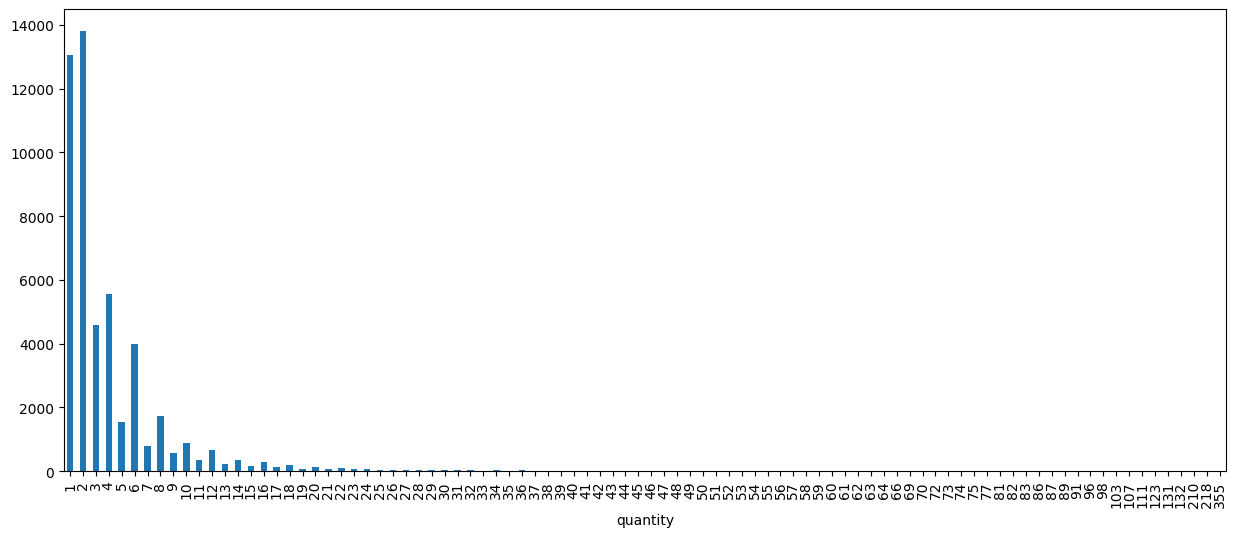

In [31]:
# Строим диаграмму число покупок/число пользователей
client_data.groupby('quantity')['quantity'].count().plot.bar(figsize=(15, 6))
plt.show()

Можно разделить пользователей на группы:
* Совершившие одну покупку
* Совершившие от 2 до 4 покупок
* Совершившие от 5 до 9 покупок
* Совершившие от 10 до 20 покупок
* Совершившие больше 20 покупок

In [32]:
# Напишем для этого функцию
def cat_quantity(quantity):
  if quantity == 1:
    return 'one_quantity'
  elif 2 <= quantity <= 4:
    return 'two_four_quantity'
  elif 5 <= quantity <= 9:
    return 'five_nine_quantity'
  elif 10 <= quantity <= 20:
    return 'ten_twenty_quantity'
  else:
    return 'more_than_twenty_quantity'

In [33]:
# Применяем ее
client_data['cat_quantity'] = client_data['quantity'].apply(cat_quantity)

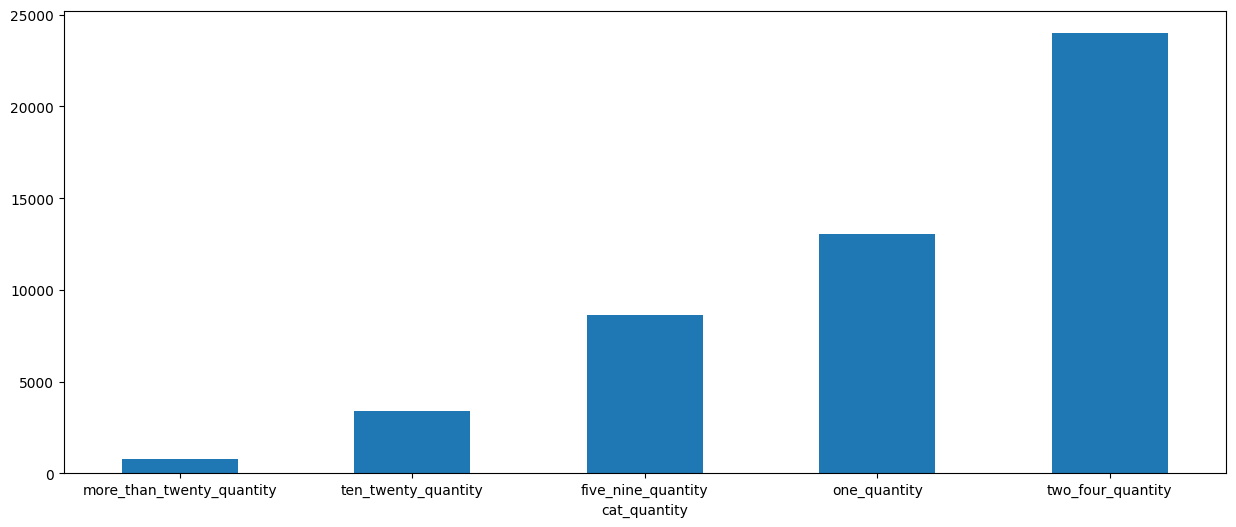

In [34]:
# Строим диаграмму категориальное число покупок/число пользователей
client_data.groupby(
    'cat_quantity'
    )['cat_quantity'].count().sort_values().plot.bar(figsize=(15, 6))
plt.xticks(rotation=0)
plt.show()

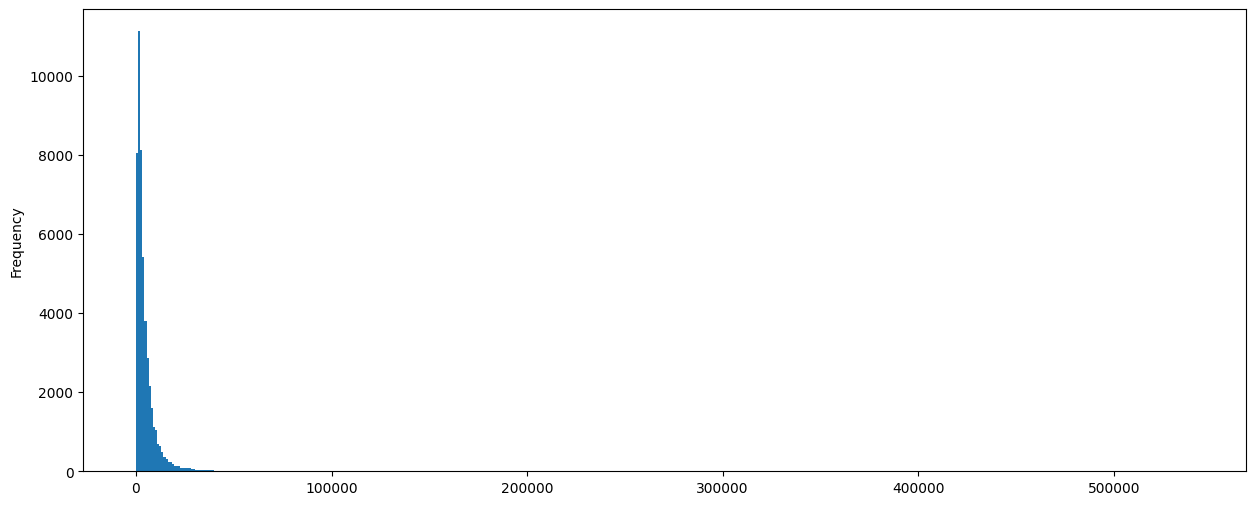

In [35]:
# Строим гистограмму суммарная цена покупок/число пользователей
client_data['price'].plot.hist(bins=500, figsize=(15, 6))
plt.show()

In [36]:
# Смотрим 20 клиентов, потративших наибольшие суммы
client_data['price'].nlargest(20)

,price
client_id,
1515915625553309277,540408.0
1515915625983356708,387583.0
1515915625853312319,265336.0
1515915625500232103,195013.0
1515915625776653984,177256.0
1515915625932678769,171608.0
1515915625959777467,145497.0
1515915625580548703,138558.0
1515915625860624470,133142.0


Можно разделить пользователей на группы:

* Совершившие покупок на сумму до 5000
* Совершившие покупок на сумму от 5000 до 10000
* Совершившие покупок на сумму от 10000 до 15000
* Совершившие покупок на сумму от 15000 до 20000
* Совершившие покупок на сумму от 20000 до 25000
* Совершившие покупок на сумму от 25000 до 50000
* Совершившие покупок на сумму от 50000 до 600000

In [37]:
# Напишем для этого функцию
def cat_price(price):
  if 0 <= price < 5000:
    return 'price_1_cat'
  elif 5000 <= price < 10000:
    return 'price_2_cat'
  elif 10000 <= price < 15000:
    return 'price_3_cat'
  elif 15000 <= price < 20000:
    return 'price_4_cat'
  elif 20000 <= price < 25000:
    return 'price_5_cat'
  elif 25000 <= price < 50000:
    return 'price_6_cat'
  elif 50000 <= price < 600000:
    return 'price_7_cat'
  else:
    return 'unknown'

In [38]:
# Применим ее
client_data['cat_price'] = client_data['price'].apply(cat_price)

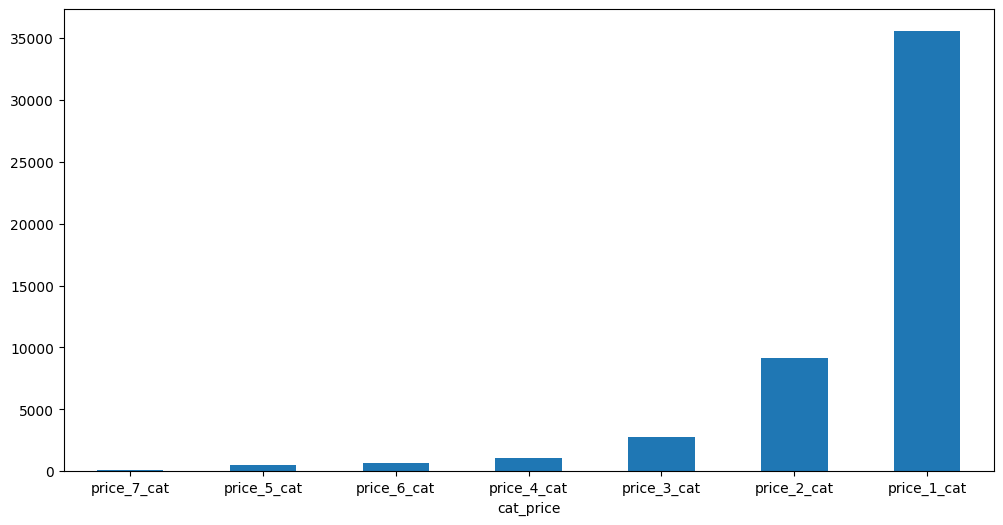

In [39]:
# Строим диаграмму категориальное число покупок/число пользователей
client_data.groupby(
    'cat_price'
    )['cat_price'].count().sort_values().plot.bar(figsize=(12, 6))
plt.xticks(rotation=0)
plt.show()

In [40]:
# Находим значение среднего чека пользователей
client_data['avg_price'] = client_data['price'] / client_data['quantity']

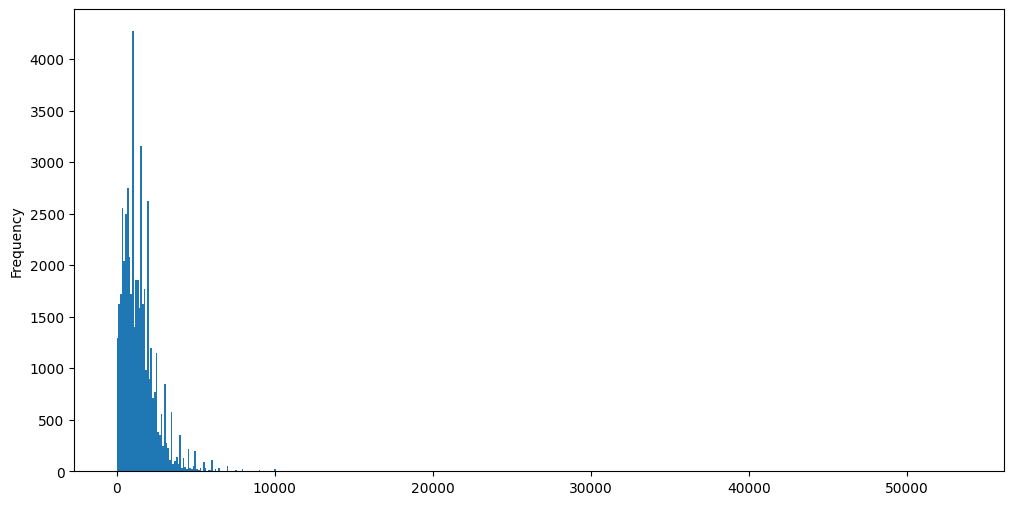

In [41]:
# Строим гистограмму средний чек/число пользователей
client_data['avg_price'].plot.hist(bins=500, figsize=(12, 6))
plt.xticks(rotation=0)
plt.show()

In [42]:
# Смотрим 20 клиентов, потративших в среднем наибольшие суммы
client_data['avg_price'].nlargest(20)

,avg_price
client_id,
1515915625971673322,53499.000000
1515915625692218402,48499.000000
1515915625959777467,48499.000000
1515915625995288129,48299.000000
1515915625781028303,37240.000000
1515915625995466015,36999.000000
1515915625490563372,31999.000000
1515915625487894579,31080.000000
1515915625581952988,29960.000000


Можно разделить пользователей на группы:

* Средний чек до 500
* Средний чек от 500 до 1000
* Средний чек от 1000 до 1500
* Средний чек от 1500 до 2000
* Средний чек от 2000 до 2500
* Средний чек от 2500 до 3000
* Средний чек от 3000 до 3500
* Средний чек от 3500 до 4000
* Средний чек от 4000 до 4500
* Средний чек от 4500 до 5000
* Средний чек от 5000 до 10000
* Средний чек от 10000 до 60000

In [43]:
# Напишем для этого функцию
def cat_avg_price(avg_price):
  if 0 <= avg_price < 500:
    return 'avg_price_1_cat'
  elif 500 <= avg_price < 1000:
    return 'avg_price_2_cat'
  elif 1000 <= avg_price < 1500:
    return 'avg_price_3_cat'
  elif 1500 <= avg_price < 2000:
    return 'avg_price_4_cat'
  elif 2000 <= avg_price < 2500:
    return 'avg_price_5_cat'
  elif 2500 <= avg_price < 3000:
    return 'avg_price_6_cat'
  elif 3000 <= avg_price < 3500:
    return 'avg_price_7_cat'
  elif 3500 <= avg_price < 4000:
    return 'avg_price_8_cat'
  elif 4000 <= avg_price < 4500:
    return 'avg_price_9_cat'
  elif 4500 <= avg_price < 5000:
    return 'avg_price_7_cat'
  elif 5000 <= avg_price < 10000:
    return 'avg_price_7_cat'
  elif 10000 <= avg_price < 60000:
    return 'avg_price_7_cat'
  else:
    return 'unknown'

In [44]:
client_data['cat_avg_price'] = client_data['avg_price'].apply(cat_avg_price)

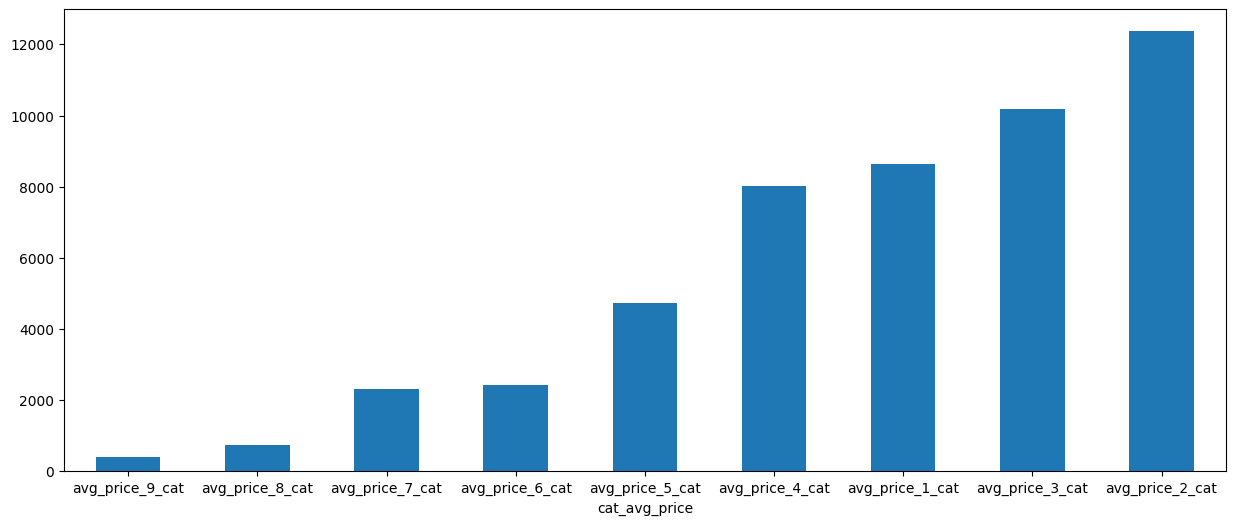

In [45]:
# Строим диаграмму категориальный средний чек/число пользователей
client_data.groupby(
    'cat_avg_price'
    )['cat_avg_price'].count().sort_values().plot.bar(figsize=(15, 6))
plt.xticks(rotation=0)
plt.show()

Количество уникальных наборов категорий у пользователя коррелирует с количество категорий, в которых совершались покупки. Чем больше уникальных наборов категорий, тем у пользователя разных категорий.

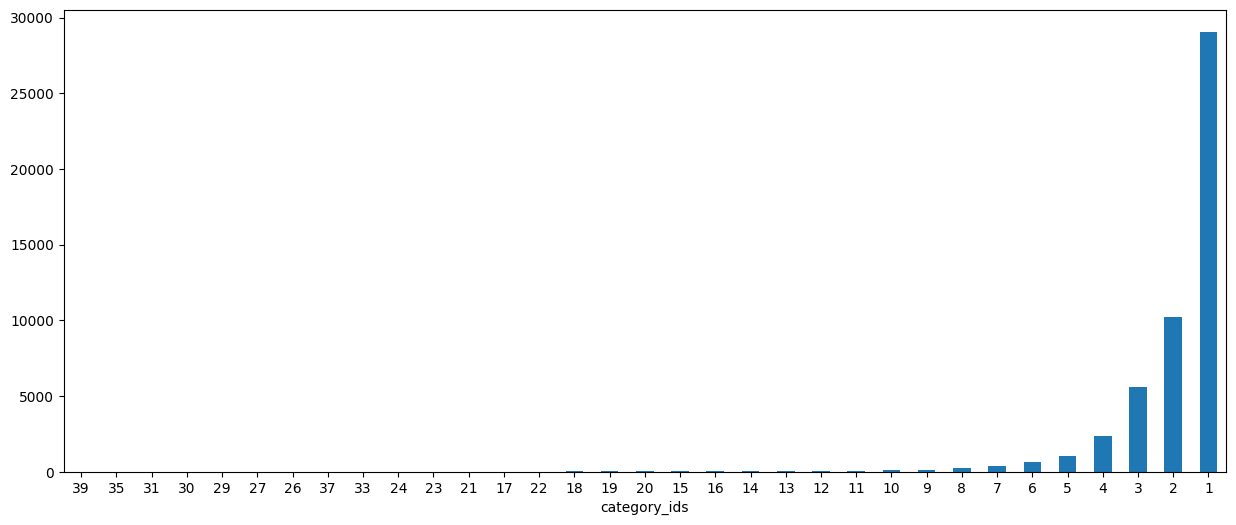

In [46]:
# Строим диаграмму число уникальных наборо категорий/число пользователей
client_data.groupby(
    'category_ids'
    )['category_ids'].count().sort_values().plot.bar(figsize=(15, 6))
plt.xticks(rotation=0)
plt.show()

Можно разделить пользователей на группы:

* 1 набор категорий
* от 2 до 5 наборов категорий
* от 6 до 9 наборов категорий
* от 10 до 20 наборов категорий
* от 21 до 39 наборов категорий

In [47]:
# Напишем для этого функцию
def cat_count(cat_count):
  if 0 <= cat_count <= 1:
    return 'cat_1_ids'
  elif 2 <= cat_count <= 5:
    return 'cat_2_ids'
  elif 6 <= cat_count <= 9:
    return 'cat_3_ids'
  elif 10 <= cat_count <= 20:
    return 'cat_4_ids'
  elif 21 <= cat_count <= 39:
    return 'cat_5_ids'
  else:
    return 'unknown'

In [48]:
# Применим ее
client_data['cat_count'] = client_data['category_ids'].apply(cat_count)

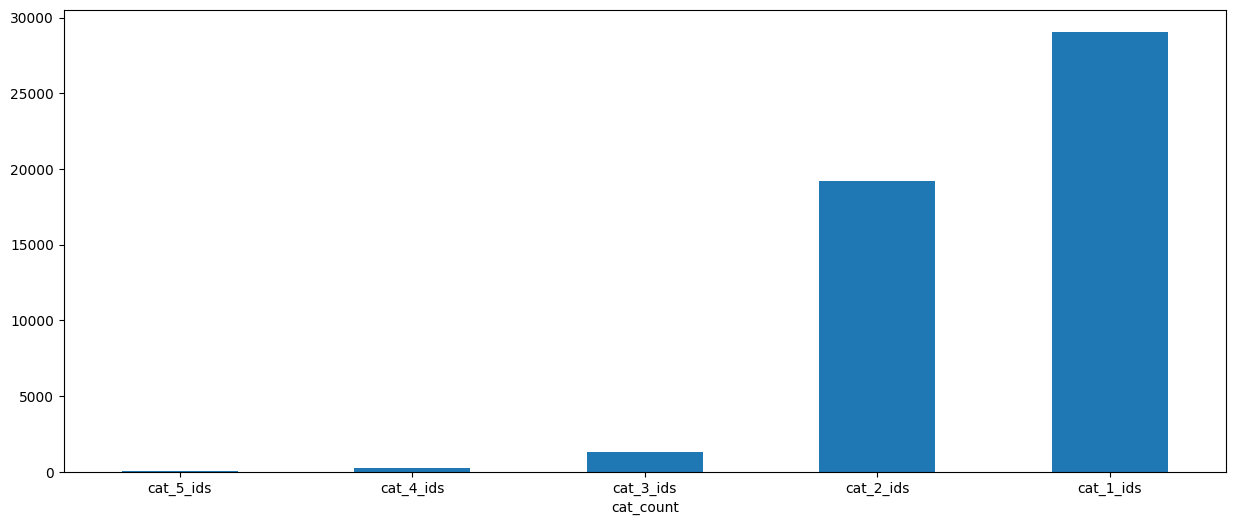

In [49]:
# Строим диаграмму категория пользователей по числу наборов категорий/число пользователей
client_data.groupby(
    'cat_count'
    )['cat_count'].count().sort_values().plot.bar(figsize=(15, 6))
plt.xticks(rotation=0)
plt.show()

Для каждого пользователя подсчитано число событий в разное время суток. Исходя из сравнения этих чисел для каждого пользователя можно разделить пользователей по категориям "Ночной", "Утрений", "Дневной", "Вечерний"

In [50]:
# Напишем для этого функцию
def cat_daytime(day, evening, morning, night):
  if max([day, evening, morning, night]) == day:
    return 'day'
  elif max([day, evening, morning, night]) == evening:
    return 'evening'
  elif max([day, evening, morning, night]) == morning:
    return 'morning'
  else:
    return 'night'

In [51]:
# Применим ее
client_data['cat_daytime'] = client_data.apply(
    lambda x: cat_daytime(
        x['Day'],
        x['Evening'],
        x['Morning'],
        x['Night']
        ), axis=1
    )

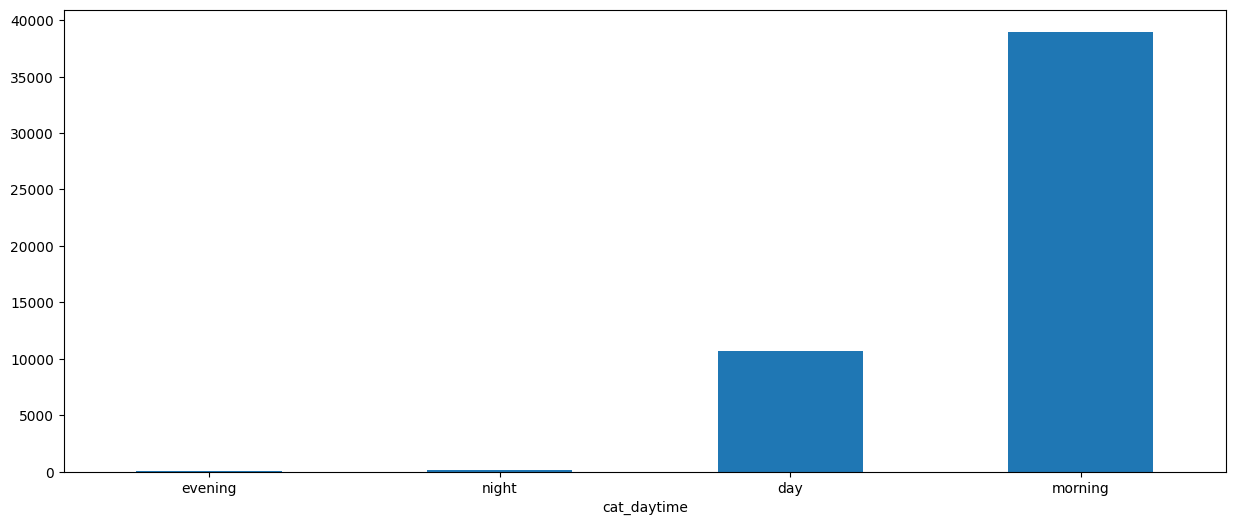

In [52]:
# Строим диаграмму категориальнoe время суток/число пользователей
client_data.groupby(
    'cat_daytime'
    )['cat_daytime'].count().sort_values().plot.bar(figsize=(15, 6))
plt.xticks(rotation=0)
plt.show()

Для каждого пользователя подсчитано число сообщений полученных по почте или через пуш. Исходя из сравнения количества сообщений полученных разными спрособами можно разведить пользователей на категории "Получающие только письма", "Получающие только пуш-уведомления", "Получающие в основном письма", "Получающие в основном пуш-уведомления"

In [53]:
# Напишем для этого функцию
def push_or_email(push, email):
  if push / (push + email) == 1:
    return 'only push'
  elif 0.5 <= push / (push + email) < 1:
    return 'most push'
  elif 0 < push / (push + email) < 0.5:
    return 'most email'
  elif push / (push + email) ==0:
    return 'only email'
  else:
    return 'unknown'

In [54]:
# Применим ее
client_data['push_or_email'] = client_data.apply(
    lambda x: push_or_email(x['mobile_push'], x['email']), axis=1
    )

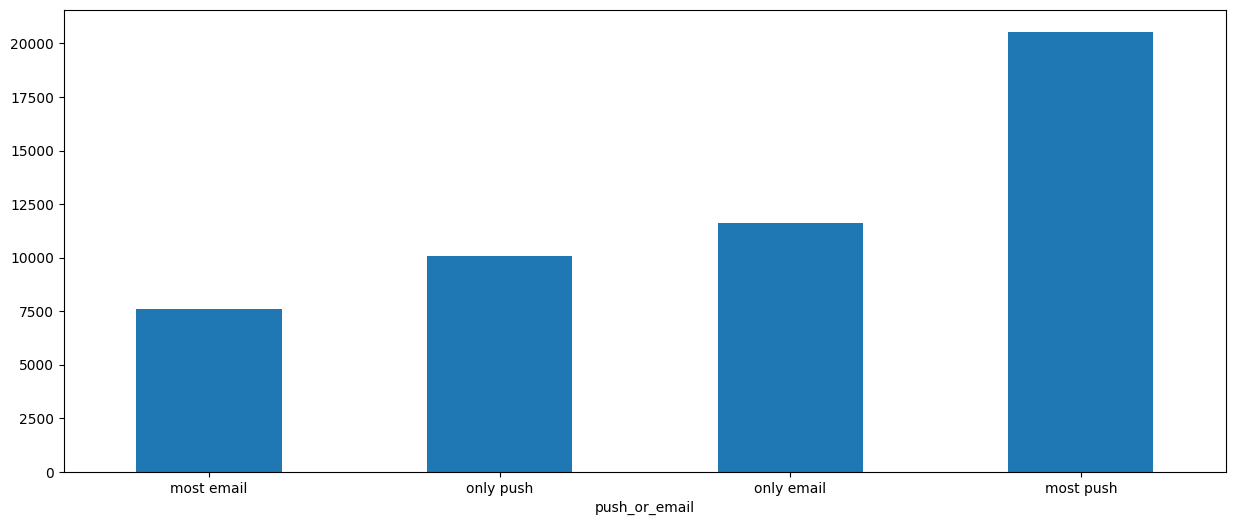

In [55]:
# Строим диаграмму категориальнoe время суток/число пользователей
client_data.groupby(
    'push_or_email'
    )['push_or_email'].count().sort_values().plot.bar(figsize=(15, 6))
plt.xticks(rotation=0)
plt.show()

In [56]:
# Смотрим информацию о колонке 'bulk_campaign_id'
client_data['bulk_campaign_id'].describe()

,bulk_campaign_id
count,49849.000000
mean,184.345624
std,95.110310
min,1.000000
25%,126.000000
50%,174.000000
75%,240.000000
max,2465.000000


In [57]:
# Смотрим 20 пользователей с самым большим числом уникальных рекламных кампаний
client_data['bulk_campaign_id'].nlargest(20)

,bulk_campaign_id
client_id,
1515915625625548006,2465.0
1515915625516327994,2460.0
1515915625489071904,1615.0
1515915625804998560,1273.0
1515915625559094114,655.0
1515915625806965679,580.0
1515915625491850844,575.0
1515915625490435854,551.0
1515915625473878252,548.0


Можно разделить пользователей на группы:

* от 0 до 100 рекламных кампаний
* от 100 до 200 рекламных кампаний
* от 200 до 300 рекламных кампаний
* от 300 до 400 рекламных кампаний
* от 400 до 500 рекламных кампаний
* от 500 до 1000 рекламных кампаний
* от 500 до 3000 рекламных кампаний

In [58]:
# Напишем для этого функцию
def cat_campaign(bulk_campaign_id):
  if 0 <= bulk_campaign_id < 100:
    return 'cat_1_campaign'
  elif 100 <= bulk_campaign_id < 200:
    return 'cat_2_campaign'
  elif 200 <= bulk_campaign_id < 300:
    return 'cat_3_campaign'
  elif 300 <= bulk_campaign_id < 400:
    return 'cat_4_campaign'
  elif 400 <= bulk_campaign_id < 500:
    return 'cat_5_campaign'
  elif 500 <= bulk_campaign_id < 1000:
    return 'cat_6_campaign'
  elif 500 <= bulk_campaign_id < 3000:
    return 'cat_7_campaign'
  else:
    return 'unknown'

In [59]:
# Применим ее
client_data['cat_campaign'] = client_data['bulk_campaign_id'].apply(
    cat_campaign
    )

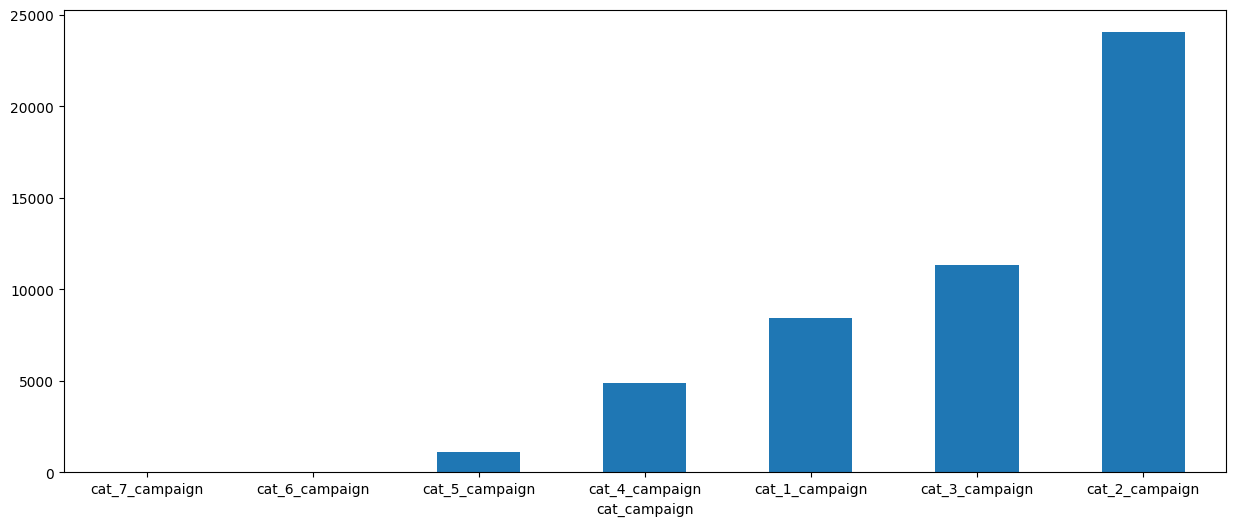

In [60]:
# Строим диаграмму категориальнoe количество кампаний/число пользователей
client_data.groupby(
    'cat_campaign'
    )['cat_campaign'].count().sort_values().plot.bar(figsize=(15, 6))
plt.xticks(rotation=0)
plt.show()

interval columns not set, guessing: ['quantity', 'price', 'category_ids', 'date', 'message_id', 'target', 'click', 'close', 'complain', 'hard_bounce', 'hbq_spam', 'open', 'purchase', 'send', 'soft_bounce', 'subscribe', 'unsubscribe', 'email', 'mobile_push', 'bulk_campaign_id', 'Day', 'Evening', 'Morning', 'Night', 'avg_price']


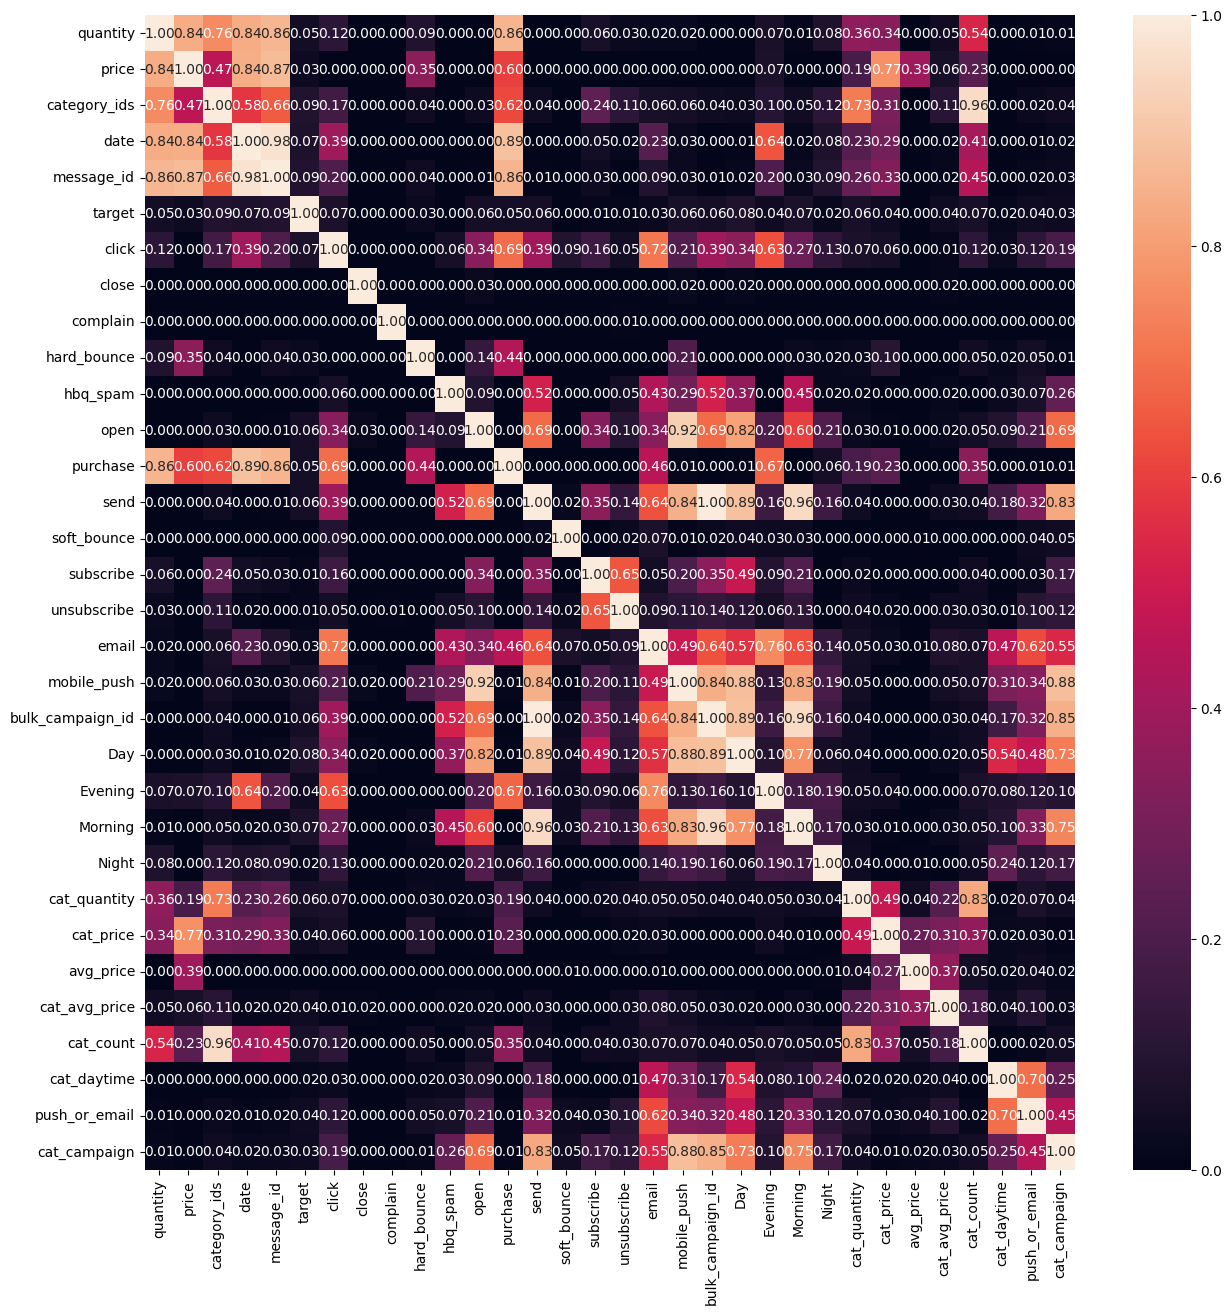

In [61]:
# Строим тепловую карту коэффициентов корреляции Спирмена
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(
    client_data.phik_matrix(),
    annot=True, fmt='.2f', ax=ax
)
plt.show()

Судя по матрице коэффициентов корреляции Спирмена существует мультиколлинеарность между:  
* 'category ids' и 'cat_count'
* 'date' и 'message_id'
* 'send' и 'Morning'
* 'Morning' и 'bulk_campaign_id'  

Из каждой пары признаков удаляем количественный, так как в датасете изначально много количественных признаков и категориальные были созданы на их основе

In [62]:
# Из каждой пары признаков удаляем количественный
client_data.drop(['category_ids', 'date', 'Morning'], axis=1, inplace=True)

interval columns not set, guessing: ['quantity', 'price', 'message_id', 'target', 'click', 'close', 'complain', 'hard_bounce', 'hbq_spam', 'open', 'purchase', 'send', 'soft_bounce', 'subscribe', 'unsubscribe', 'email', 'mobile_push', 'bulk_campaign_id', 'Day', 'Evening', 'Night', 'avg_price']


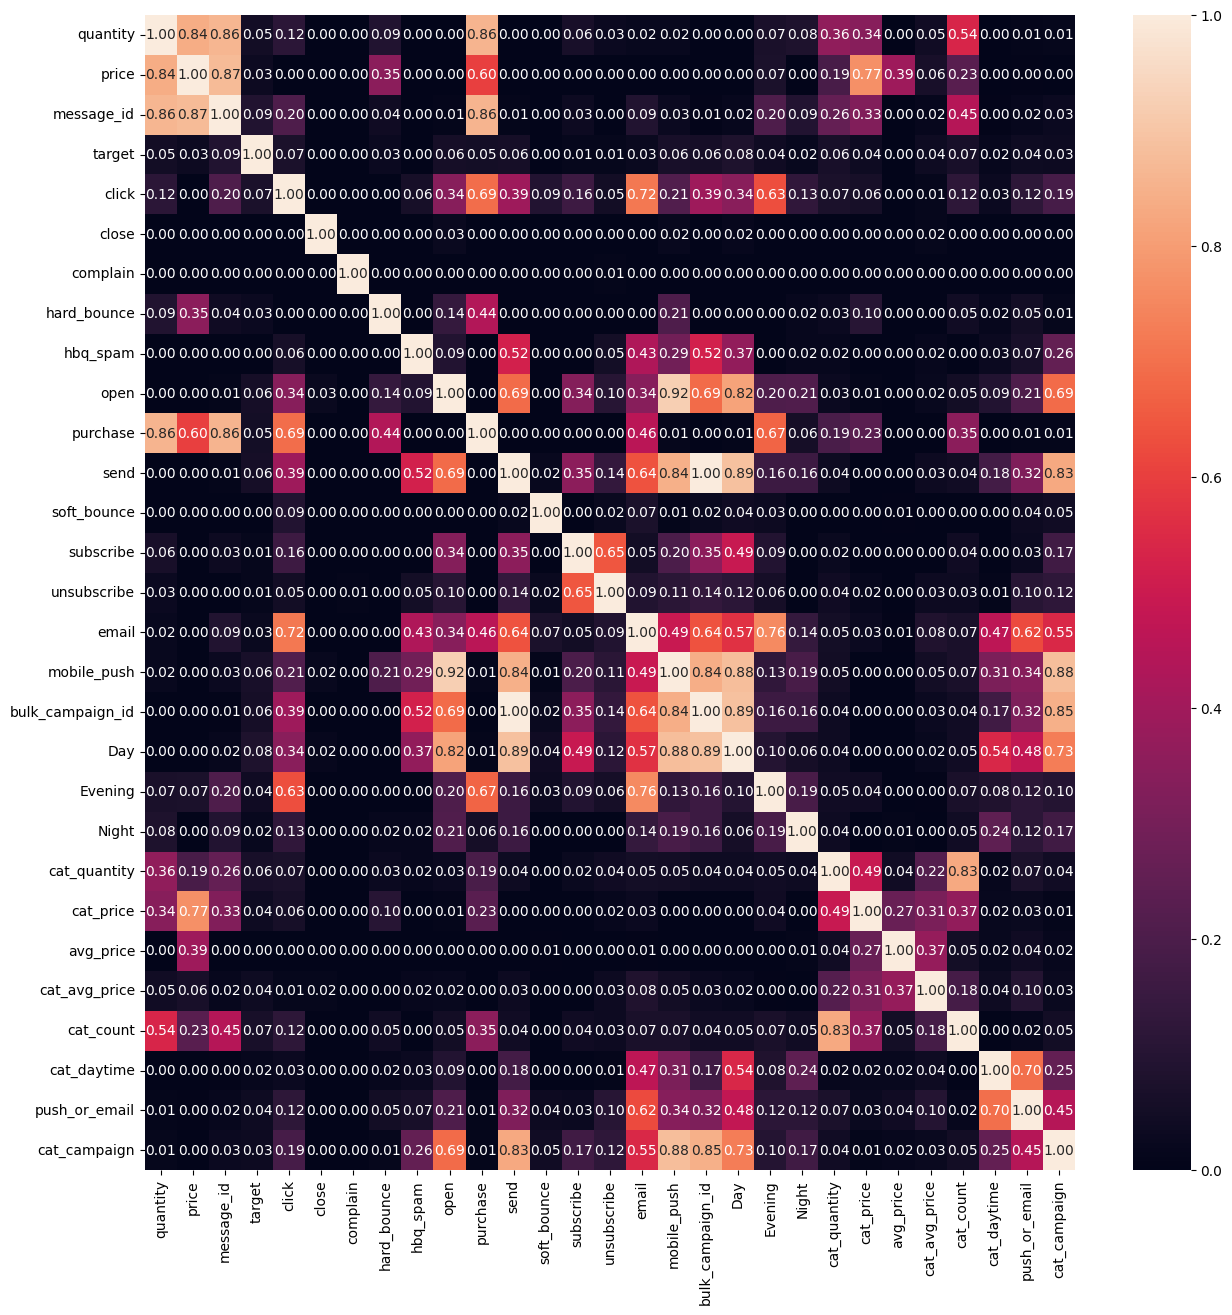

In [63]:
# Строим новую тепловую карту коэффициентов корреляции Спирмена
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(
    client_data.phik_matrix(),
    annot=True, fmt='.2f', ax=ax
)
plt.show()

In [64]:
X = client_data.drop('target', axis=1)
y = client_data['target']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
    )

In [66]:
num_col_names = X_train.select_dtypes(
    include='number'
).columns.tolist()

In [67]:
cat_col_names = X_train.select_dtypes(
    exclude='number'
).columns.tolist()

In [68]:
categories = [
    X_train[cat_col_names[0]].unique(),
    X_train[cat_col_names[1]].unique(),
    X_train[cat_col_names[2]].unique(),
    X_train[cat_col_names[3]].unique(),
    X_train[cat_col_names[4]].unique(),
    X_train[cat_col_names[5]].unique(),
    X_train[cat_col_names[6]].unique()
]

In [69]:
# Создаем пайплайн для ord-кодирования
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord',
            SimpleImputer(
                missing_values=np.nan,
                strategy='most_frequent'
            )
        ),
        (
            'ord',
             OrdinalEncoder(
                 categories=categories,
                 handle_unknown='use_encoded_value',
                 unknown_value=np.nan
         )
        ),
        (
            'simpleImputer_after_ord',
            SimpleImputer(
                missing_values=np.nan,
                strategy='most_frequent'
            )
        )
    ]
)

In [70]:
# Создаем пайплайн для кодирования и масштабирования данных
data_preprocessor = ColumnTransformer(
    [
        ('ord', ord_pipe, cat_col_names),
        ('num', StandardScaler(), num_col_names)
    ],
    remainder='passthrough'
)

In [71]:
# Создаем сетку параметров для пайплайна
param_grid = [
    {
        'models': [DecisionTreeClassifier(
            random_state=RANDOM_STATE
        )],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [
            StandardScaler(), MinMaxScaler(),
            RobustScaler(), 'passthrough'
        ]
    },

    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [
            StandardScaler(), MinMaxScaler(),
            RobustScaler(), 'passthrough'
        ]
    },
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [
            StandardScaler(), MinMaxScaler(),
            RobustScaler(), 'passthrough'
        ]
    }
]

In [72]:
# Объединяем пайплайны предобработки и моделирования в фильнальный пайплайн
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(
            random_state=RANDOM_STATE
        )
        )
    ]
)

In [73]:
# Создаем объект класса GridSearchCV для поиска оптимальной модели и гиперпараметров
grid = GridSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
)
# Обучаем grid на тренировочных данных
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord',
                                                                         Pipeline(steps=[('simpleImputer_before_ord',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ord',
                                                                                          OrdinalEncoder(categories=[array(['two_four_quantity', 'one_quantity', 'five_nine_quantity',
       'more_than_twenty_quantity', 'ten_twenty_quant...
                         {'models': [KNeighborsClassifier()],
                          'models__n_neighbors': range(2, 5),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']},
                         {'models': [LogisticRegression(penalty='l1',
                                                        random_state=42,
                                                        solver='liblinear')],
                          'models__C': range(1, 5),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']}],
             scoring='roc_auc')

In [74]:
# Выводим метрику лучшей модели
print(
    'Метрика лучшей модели на кросс-валидационной выборке:',
    round(grid.best_score_, 3)
)

Метрика лучшей модели на кросс-валидационной выборке: 0.709


In [75]:
# Сохраняем лучшую модель
best_model = grid.best_estimator_

In [76]:
# Выполняем предсказания на тестовой выборке и сохраняем их в переменную
preds = best_model.predict_proba(X_test)

In [77]:
# Находим метрику лучшей модели на тестовой выборке
print(
    'Метрика лучшей модели на тестовой выборке:',
    round(
        roc_auc_score(
            y_test, preds[:,1]
        ), 3
    )
)

Метрика лучшей модели на тестовой выборке: 0.738


In [78]:
# С помощью shap создаем Explainer для модели
explainer = shap.Explainer(
    best_model[1].predict_proba,
    best_model[0].transform(X_test),
    feature_names=best_model[0].get_feature_names_out()
)

In [79]:
# Расчитываем shap_values
shap_values = explainer(best_model[0].transform(X_test))

PermutationExplainer explainer: 9971it [06:45, 24.26it/s]                          


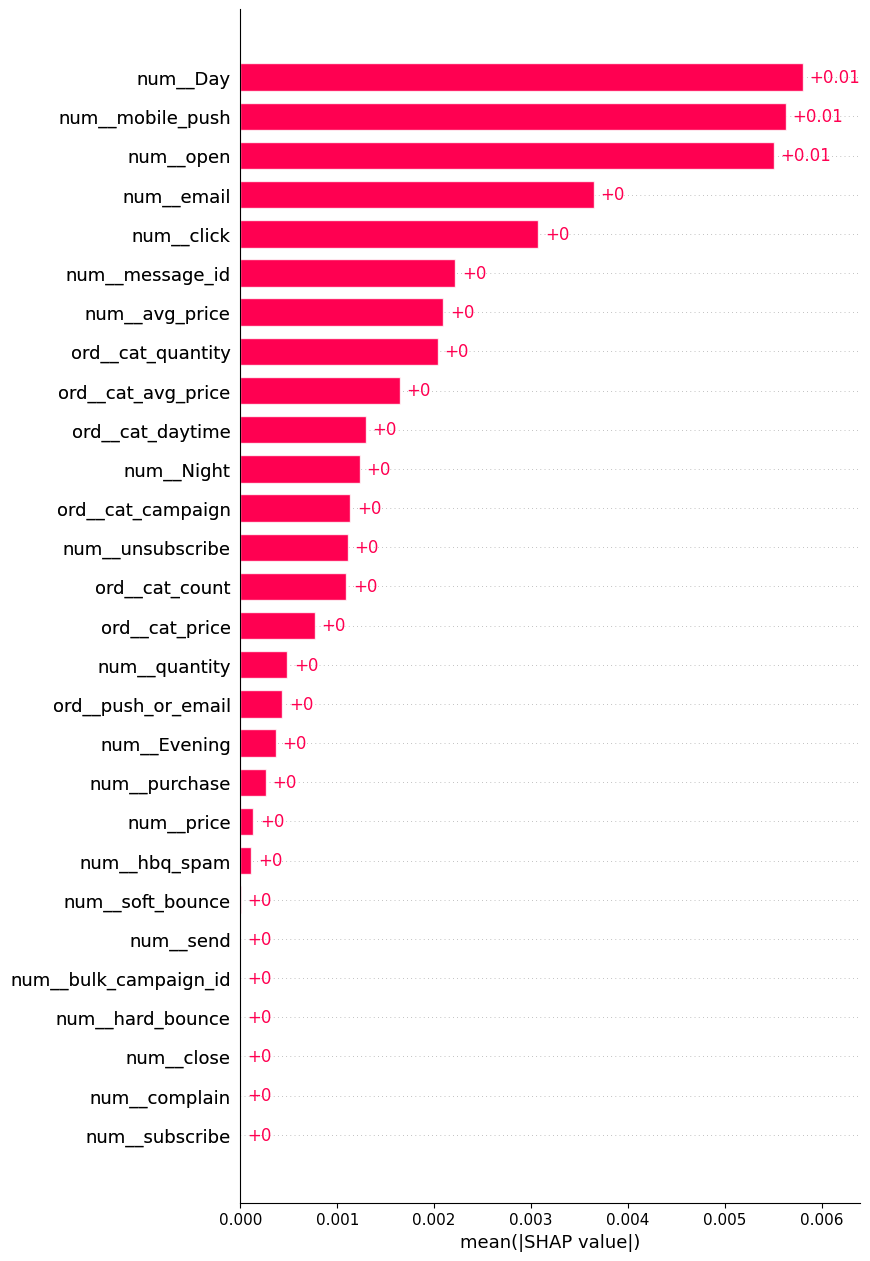

In [80]:
# Строим диаграмму важности признаков
shap.plots.bar(shap_values[:, :, 1], max_display=29)

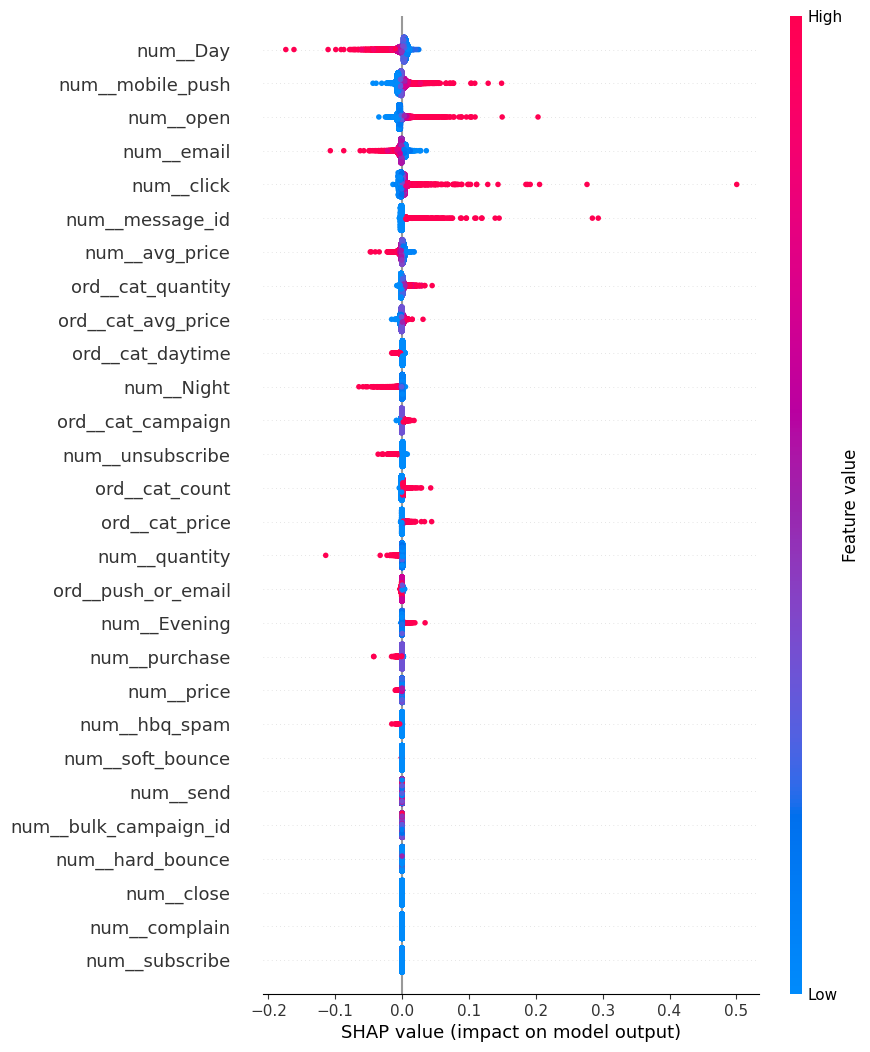

In [81]:
# Строим 'пчелинную' диаграмму важности признаков
shap.plots.beeswarm(shap_values[:, :, 1], max_display=29)

# Выводы

В ходе работы были загружены исходные данные.  
Была проведена их предобработка, был изменен тип данных о времени создания чека.  
Данные были агрегированы и объединены в общий датасет.  
На основе изучения распределения количественных признаков были созданы новые категориальные признаки.  
Был проведен анализ коэффициентов корреляции Спирмена. Из каждой пары мультиколлинеарных признаков был удален один из них.  
Произведено разделение датасета на тренировочную и тестовую выборки.  
Разработан пайплайн для поиска модели предсказания поведения покупателей с наибольшим roc_auc_score.
На основе моделирования лучшей моделью стала модель LogisticRegression (C=4, penalty='l1', random_state=42, solver='liblinear')  
roc_auc_score:
* На кросс валидации по тренировочной выборке 0.709
* На тестовой выборке 0.738

Проведен расчет важности признаков по методике shap. Важность признаков и характер их связи с целевым признаком можно оценить по соответствующим диаграммам.  
Близкой к нулевой важность обладают 7 признаков. При этом созданые в ходе работы категориальные признаки не входят в и число.